#### AI Travel Agent & Expense Planner
##### Purpose: Trip planning for any city worldwide with Realtime data.

In [1]:
from langgraph.graph import START,END,StateGraph,MessagesState
from langchain_community.tools import tool
from langgraph.prebuilt import tools_condition,ToolNode
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_core.messages import HumanMessage, SystemMessage

In [2]:
from pydantic import BaseModel,Field
from typing import List

class Format(BaseModel):
    attractions:List[str]=Field(description="list of top 5 attractions at given location")
    restaurants:List[str]=Field(description="list of top 5 restaurants at given location")
    activities:List[str]=Field(description="list of top 5 activities to do, at given location")
    transporation:List[str]=Field(description="list of ways to transport from place of origin to given location")
    


In [3]:
from langchain_core.output_parsers import PydanticOutputParser
from langchain_groq import ChatGroq

output_parser=PydanticOutputParser(pydantic_object=Format)
llm=ChatGroq(model="llama-3.1-8b-instant")

from langchain_core.prompts import PromptTemplate


In [4]:
@tool
def get_attarction_activites(Location:str,origin:str)->str:

    """This tool provides list of top 5 attractions, list of top 5 resturants with multi-cusines, list of top 5 activities to do and ways of transporation in given location 
    
    Args:
        Location (str): Trip Destination location
        origin (str): Place of origin for trip
        

    Returns:
        str: Deatils of attrcation of given location
        
        """
    
    print("________Entered_attraction_function__________")
    
    
    prompt=PromptTemplate.from_template("""You are a helpful assistant that provides the following details about a destination:
- Top 5 tourist attractions
- Top 5 multi-cuisine restaurants
- Top 5 activities to do
- Ways of transportation from the place of origin to the destination

Place of origin: {origin}
Destination: {Location}

Respond ONLY in the following JSON format:
{format_instructions}
""")
    
    chain= prompt| llm | output_parser
    res= chain.invoke({"Location":Location,"origin":origin,"format_instructions":output_parser.get_format_instructions()})
    print(res)

    
    
    print("*********E N D Attractions function&&&&&&&&&&&&&&&&&")
    return res

In [5]:
get_attarction_activites.invoke({"Location":"london","origin":"india"})

________Entered_attraction_function__________
attractions=['Buckingham Palace', 'The London Eye', 'The British Museum', 'The National Gallery', 'The Tower of London'] restaurants=['Gordon Ramsay at the London House', 'The Delaunay', 'Honey & Co', 'Padella', 'The Barbary'] activities=['Take a West End musical or play', 'Explore the street art in Shoreditch', 'Take a stroll along the South Bank of the Thames', 'Visit the Sky Garden for panoramic views', 'Take a ride on the London Duck Tour'] transporation=['Fly from major Indian airports (Delhi, Mumbai, Bengaluru) to London Heathrow (LHR) or Gatwick (LGW)', 'Take a connecting flight from Indian cities to London', 'Take a direct train from Paris or Brussels to London on the Eurostar', 'Take a bus or coach from various European cities to London', 'Travel by ferry from the UK coast to London']
*********E N D Attractions function&&&&&&&&&&&&&&&&&


Format(attractions=['Buckingham Palace', 'The London Eye', 'The British Museum', 'The National Gallery', 'The Tower of London'], restaurants=['Gordon Ramsay at the London House', 'The Delaunay', 'Honey & Co', 'Padella', 'The Barbary'], activities=['Take a West End musical or play', 'Explore the street art in Shoreditch', 'Take a stroll along the South Bank of the Thames', 'Visit the Sky Garden for panoramic views', 'Take a ride on the London Duck Tour'], transporation=['Fly from major Indian airports (Delhi, Mumbai, Bengaluru) to London Heathrow (LHR) or Gatwick (LGW)', 'Take a connecting flight from Indian cities to London', 'Take a direct train from Paris or Brussels to London on the Eurostar', 'Take a bus or coach from various European cities to London', 'Travel by ferry from the UK coast to London'])

#### `OpenWeatherMap` component to fetch weather information.

In [6]:
import os
from dotenv import load_dotenv
from langchain_community.utilities import OpenWeatherMapAPIWrapper
from warnings import filterwarnings
filterwarnings("ignore")

load_dotenv()

True

In [7]:
import os
from langchain_community.utilities import OpenWeatherMapAPIWrapper

os.environ["OPENWEATHERMAP_API_KEY"] = os.getenv("openweatherkey_one")
weather = OpenWeatherMapAPIWrapper()
weather_data = weather.run("London,GB")
print(weather_data)

In London,GB, the current weather is as follows:
Detailed status: overcast clouds
Wind speed: 0.89 m/s, direction: 335°
Humidity: 79%
Temperature: 
  - Current: 15.85°C
  - High: 17.06°C
  - Low: 13.28°C
  - Feels like: 15.55°C
Rain: {}
Heat index: None
Cloud cover: 85%


In [8]:
@tool
def get_weather_detail(Location:str)->str:
    """This tool provides current and forecasting weather for given location"""
    pass

In [9]:
@tool
def get_hotel_costs(Location:str)->str:
    """This tool provides hotels and its prices in given location"""
    pass


In [10]:
@tool
def get_hotel_price(Hotel_name:str)->str:
        """This tool provides price per Night of given Hotel"""
        pass


In [11]:
@tool
def calculate_total_cost(price:float,days:float)->float:
        """This tool provides total cost for given hotel price and no.of days"""
        pass

In [12]:
@tool
def add(a:float,b:float)->float:
    """This tool provides addition of two numbers"""
    pass

In [13]:
@tool
def multiply(a:float,b:float)->float:
    """This tool provides multiplication of two numbers"""
    pass

In [14]:
@tool
def currency_conversion()->float:
    """This tool converts given USD to equivalent currency amount in given location"""
    pass

In [15]:
def complete_Itenary_generation():
    pass


In [16]:
def total_trip_expenses():
    pass

In [17]:
def travel_Planning(state:MessagesState):
    origin=input("Enter the place of origin for the journey").lower()
    location=input("Enter the city name for which you want travel plan and details").lower()
    Days=input("Enter no.of days for the trip")
    Days=float(Days)
    budget=input("Enter max budget in `USD` for entire trip")
    budget=float(budget)
    print("Please wait...., while our AI travel agent is planning Iternary according to your details.....")
    print(type(Days),type(budget))
    state["messages"].append(HumanMessage(content=f"Origin: {origin}"))
    state["messages"].append(HumanMessage(content=f"Destination: {location}"))
    state["messages"].append(HumanMessage(content=f"Trip Duration: {Days} days"))
    state["messages"].append(HumanMessage(content=f"Budget: ${budget}"))

    print("********E N D of travel_planning*********")


    return state

In [18]:
myTools=[get_attarction_activites,get_weather_detail,get_hotel_costs,get_hotel_price,calculate_total_cost,add,multiply,currency_conversion]

In [19]:
from langchain_openai import ChatOpenAI
agent=ChatOpenAI(model="o4-mini")
React_agent=agent.bind_tools(myTools)

In [ ]:
def agent_planning(state:MessagesState):
    print("$$$$$$$$ start of agent planning$$$$$$$$$$$44")
    current_state=state["messages"][-1]
    origin=state["messages"][0]
    Destination=state["messages"][1]
    Days=state["messages"][2]
    budget=state["messages"][3]
    prompt=f"""You are a helpful Travel planning assistant with binded tools,planning trip from {origin} to given Destination {Destination}, for {Days} days with total budget of {budget} 
please plan step wise as follows:
1. Search attractions and activities
2. Search weather and forecasting
3. Search Hotels
4. Select one Hotel and estimate cost for given no.of days within given budget using appropriate tools (calculate total cost) 
Only take actions based on current state: "{current_state}"""
    res=React_agent.invoke([prompt])
    print(res.tool_calls)
    state["messages"].append(res)
    print("****************E N D OF Agent_planning************")
    return state

In [21]:
# res=agent_planning({'messages': ['hi', 'india','london', 3.0, 1000.0]})
# print(res.tool_calls)

In [22]:
# print(res.tool_calls)

In [23]:
workflow1=StateGraph(MessagesState)

In [24]:
workflow1.add_node("start_planning",travel_Planning)

In [25]:
workflow1.add_node("Agent_Planning",agent_planning)

In [26]:
myTools=[get_attarction_activites,get_weather_detail,get_hotel_costs,get_hotel_price,calculate_total_cost,add,multiply,currency_conversion]

In [27]:
tools=ToolNode(myTools)

In [28]:
workflow1.add_node("tools",tools)

In [29]:
workflow1.add_edge(START,"start_planning")

In [30]:
workflow1.add_edge("start_planning","Agent_Planning")

In [31]:
workflow1.add_conditional_edges("Agent_Planning",tools_condition)
workflow1.add_edge("tools","Agent_Planning")

In [32]:
react_agent=workflow1.compile()

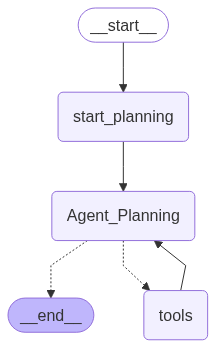

In [33]:
from IPython.display import Image, display
display(Image(react_agent.get_graph().draw_mermaid_png()))

In [34]:
from langchain_core.messages import HumanMessage, SystemMessage
react_agent.invoke({"messages":["hi"]})


Please wait...., while our AI travel agent is planning Iternary according to your details.....
<class 'float'> <class 'float'>
********E N D of travel_planning*********
$$$$$$$$ start of agent planning$$$$$$$$$$$44
[{'name': 'get_attarction_activites', 'args': {'Location': 'London', 'origin': 'India'}, 'id': 'call_7uN9Kg23A5PptOMB0LBvw7HU', 'type': 'tool_call'}]
****************E N D OF Agent_planning************
________Entered_attraction_function__________
attractions=['Buckingham Palace', 'The British Museum', 'The National Gallery', 'The Tower of London', 'Hyde Park'] restaurants=['Dishoom', 'Padella', 'Honey & Co', 'The Delaunay', 'Brick Lane Curry House'] activities=['Take a ride on the London Eye', 'Explore the city on a hop-on hop-off bus', 'Visit the famous markets of Camden and Brick Lane', 'Take a cruise on the Thames', 'Visit the London Zoo'] transporation=['Flights from Indian cities (Mumbai, Delhi, etc.) to London Heathrow airport', 'Flights from Indian cities (Mumbai, De

KeyboardInterrupt: 